In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import json
import re
from tqdm import tqdm

root = os.path.join('data')

# TRIPADVISOR

In [39]:
df = pd.read_csv(os.path.join(root, 'trip_advisor', 'tripadvisor_european_restaurants.csv'))

C:\Users\jbart\AppData\Local\Temp\ipykernel_10324\3130145802.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(root, 'trip_advisor', 'tripadvisor_european_restaurants.csv'))


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1083397 entries, 0 to 1083396
Data columns (total 42 columns):
 #   Column                             Non-Null Count    Dtype  
---  ------                             --------------    -----  
 0   restaurant_link                    1083397 non-null  object 
 1   restaurant_name                    1083396 non-null  object 
 2   original_location                  1083397 non-null  object 
 3   country                            1083397 non-null  object 
 4   region                             1033074 non-null  object 
 5   province                           742765 non-null   object 
 6   city                               682712 non-null   object 
 7   address                            1083397 non-null  object 
 8   latitude                           1067607 non-null  float64
 9   longitude                          1067607 non-null  float64
 10  claimed                            1081555 non-null  object 
 11  awards                  

In [5]:
df.describe()

,latitude,longitude,open_days_per_week,open_hours_per_week,working_shifts_per_week,avg_rating,total_reviews_count,reviews_count_in_default_language,excellent,very_good,average,poor,terrible,food,service,value,atmosphere
count,1.067607e+06,1.067607e+06,593832.000000,593832.000000,593832.000000,986761.000000,1.031162e+06,988204.000000,988204.000000,988204.000000,988204.000000,988204.000000,988204.000000,599325.000000,604287.000000,602692.000000,261785.000000
mean,4.656718e+01,5.838040e+00,6.327081,62.023282,7.630754,4.035943,1.028890e+02,44.563415,24.653440,10.490516,4.109302,2.355306,2.954850,4.104179,4.067245,3.982897,3.933682
std,5.882611e+00,8.639410e+00,0.966734,30.538134,2.550128,0.713694,2.672415e+02,148.728179,89.850801,35.512256,15.669631,9.352756,11.030069,0.564208,0.581267,0.577605,0.555262
min,2.764031e+01,-7.121809e+01,1.000000,0.000000,1.000000,1.000000,0.000000e+00,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,4.190986e+01,-8.027315e-01,6.000000,39.000000,6.000000,3.500000,6.000000e+00,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,4.000000,4.000000,3.500000,3.500000
50%,4.658510e+01,5.646530e+00,7.000000,58.500000,7.000000,4.000000,2.400000e+01,7.000000,3.000000,2.000000,1.000000,0.000000,0.000000,4.000000,4.000000,4.000000,4.000000
75%,5.140537e+01,1.223767e+01,7.000000,81.500000,7.000000,4.500000,9.300000e+01,26.000000,13.000000,6.000000,2.000000,1.000000,2.000000,4.500000,4.500000,4.500000,4.500000
max,6.994156e+01,3.336942e+01,7.000000,168.000000,15.000000,5.000000,5.240400e+04,15229.000000,9383.000000,4091.000000,2132.000000,1253.000000,1215.000000,5.000000,5.000000,5.000000,5.000000


In [6]:
df.head()

,restaurant_link,restaurant_name,original_location,country,region,province,city,address,latitude,longitude,...,excellent,very_good,average,poor,terrible,food,service,value,atmosphere,keywords
0,g10001637-d10002227,Le 147,"[""Europe"", ""France"", ""Nouvelle-Aquitaine"", ""Ha...",France,Nouvelle-Aquitaine,Haute-Vienne,Saint-Jouvent,"10 Maison Neuve, 87510 Saint-Jouvent France",45.961674,1.169131,...,2.0,0.0,0.0,0.0,0.0,4.0,4.5,4.0,NaN,NaN
1,g10001637-d14975787,Le Saint Jouvent,"[""Europe"", ""France"", ""Nouvelle-Aquitaine"", ""Ha...",France,Nouvelle-Aquitaine,Haute-Vienne,Saint-Jouvent,"16 Place de l Eglise, 87510 Saint-Jouvent France",45.957040,1.205480,...,2.0,2.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2,g10002858-d4586832,Au Bout du Pont,"[""Europe"", ""France"", ""Centre-Val de Loire"", ""B...",France,Centre-Val de Loire,Berry,Rivarennes,"2 rue des Dames, 36800 Rivarennes France",46.635895,1.386133,...,3.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
3,g10002986-d3510044,Le Relais de Naiade,"[""Europe"", ""France"", ""Nouvelle-Aquitaine"", ""Co...",France,Nouvelle-Aquitaine,Correze,Lacelle,"9 avenue Porte de la Correze 19170, 19170 Lace...",45.642610,1.824460,...,1.0,0.0,0.0,0.0,0.0,4.5,4.5,4.5,NaN,NaN
4,g10022428-d9767191,Relais Du MontSeigne,"[""Europe"", ""France"", ""Occitanie"", ""Aveyron"", ""...",France,Occitanie,Aveyron,Saint-Laurent-de-Levezou,"route du Montseigne, 12620 Saint-Laurent-de-Le...",44.208860,2.960470,...,4.0,7.0,0.0,0.0,0.0,4.5,4.5,4.5,NaN,NaN


In [7]:
df.columns

Index(['restaurant_link', 'restaurant_name', 'original_location', 'country',
       'region', 'province', 'city', 'address', 'latitude', 'longitude',
       'claimed', 'awards', 'popularity_detailed', 'popularity_generic',
       'top_tags', 'price_level', 'price_range', 'meals', 'cuisines',
       'special_diets', 'features', 'vegetarian_friendly', 'vegan_options',
       'gluten_free', 'original_open_hours', 'open_days_per_week',
       'open_hours_per_week', 'working_shifts_per_week', 'avg_rating',
       'total_reviews_count', 'default_language',
       'reviews_count_in_default_language', 'excellent', 'very_good',
       'average', 'poor', 'terrible', 'food', 'service', 'value', 'atmosphere',
       'keywords'],
      dtype='object')

In [8]:
dfg = df[['restaurant_name', 'country', 'city', 'latitude', 'longitude', 
          'price_level', 'price_range', 'cuisines', 'special_diets', 
          'features', 'vegetarian_friendly', 'vegan_options', 'gluten_free']].copy()

In [9]:
df['meals'].value_counts()

meals
Lunch, Dinner                                            196123
Dinner                                                    67459
Breakfast, Lunch, Dinner                                  51749
Lunch, Dinner, After-hours                                31493
Dinner, Lunch                                             27103
                                                          ...  
Lunch, Brunch, After-hours, Dinner, Breakfast                 1
After-hours, Drinks, Dinner, Lunch, Brunch                    1
Brunch, Lunch, Dinner, Breakfast, Drinks                      1
Drinks, Lunch, Dinner, Breakfast, Brunch, After-hours         1
Dinner, After-hours, Breakfast, Brunch, Lunch                 1
Name: count, Length: 745, dtype: int64

In [10]:
df['price_level'].value_counts()

price_level
€€-€€€    537918
€         240205
€€€€       28069
Name: count, dtype: int64

<Axes: ylabel='count'>

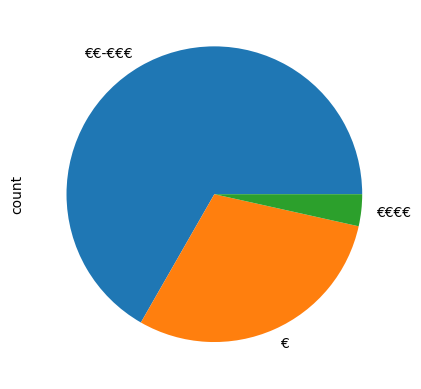

In [12]:
df['price_level'].value_counts().plot(kind='pie')

In [13]:
df['price_range'].value_counts()

price_range
€10-€30      5937
€5-€15       5810
€10-€20      5148
€5-€20       4793
€10-€25      4448
             ... 
€69-€127        1
€55-€58         1
€40-€127        1
€224-€230       1
€35-€180        1
Name: count, Length: 7298, dtype: int64

<Axes: ylabel='count'>

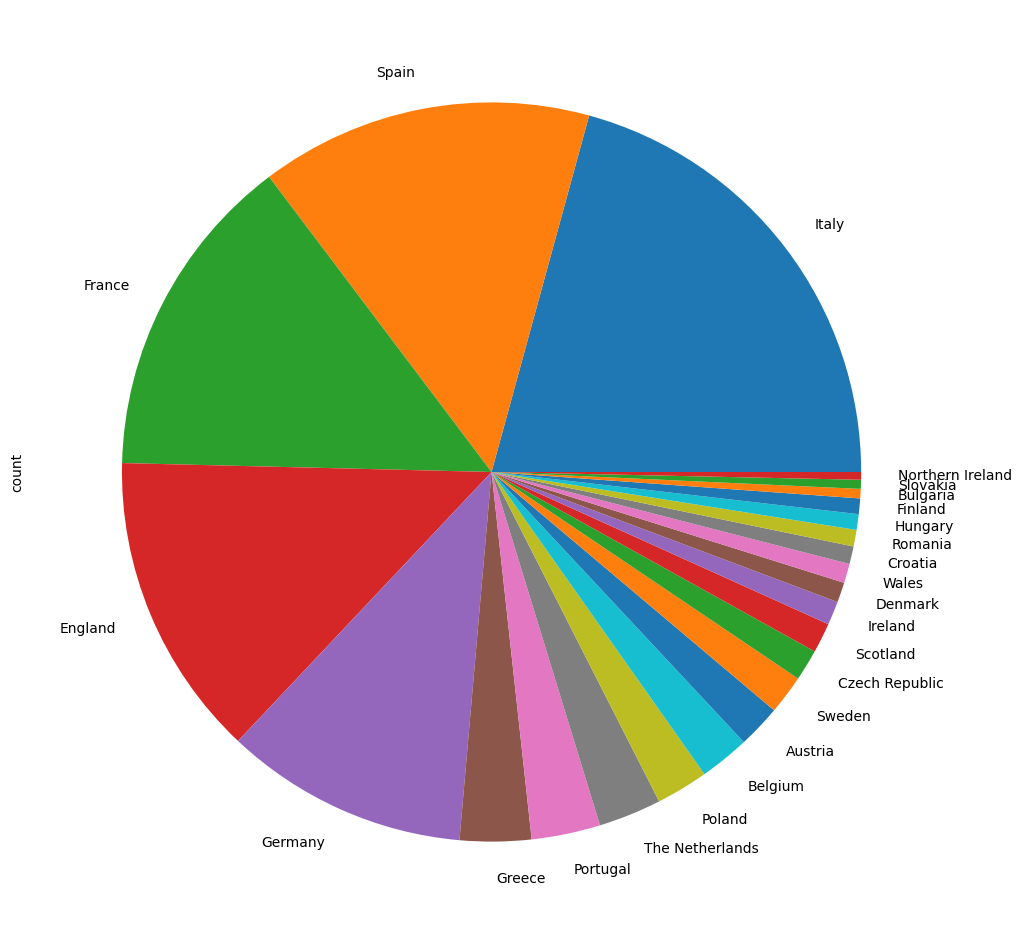

In [14]:
df['country'].value_counts().plot(kind='pie', figsize=(25,12))

<Axes: xlabel='special_diets'>

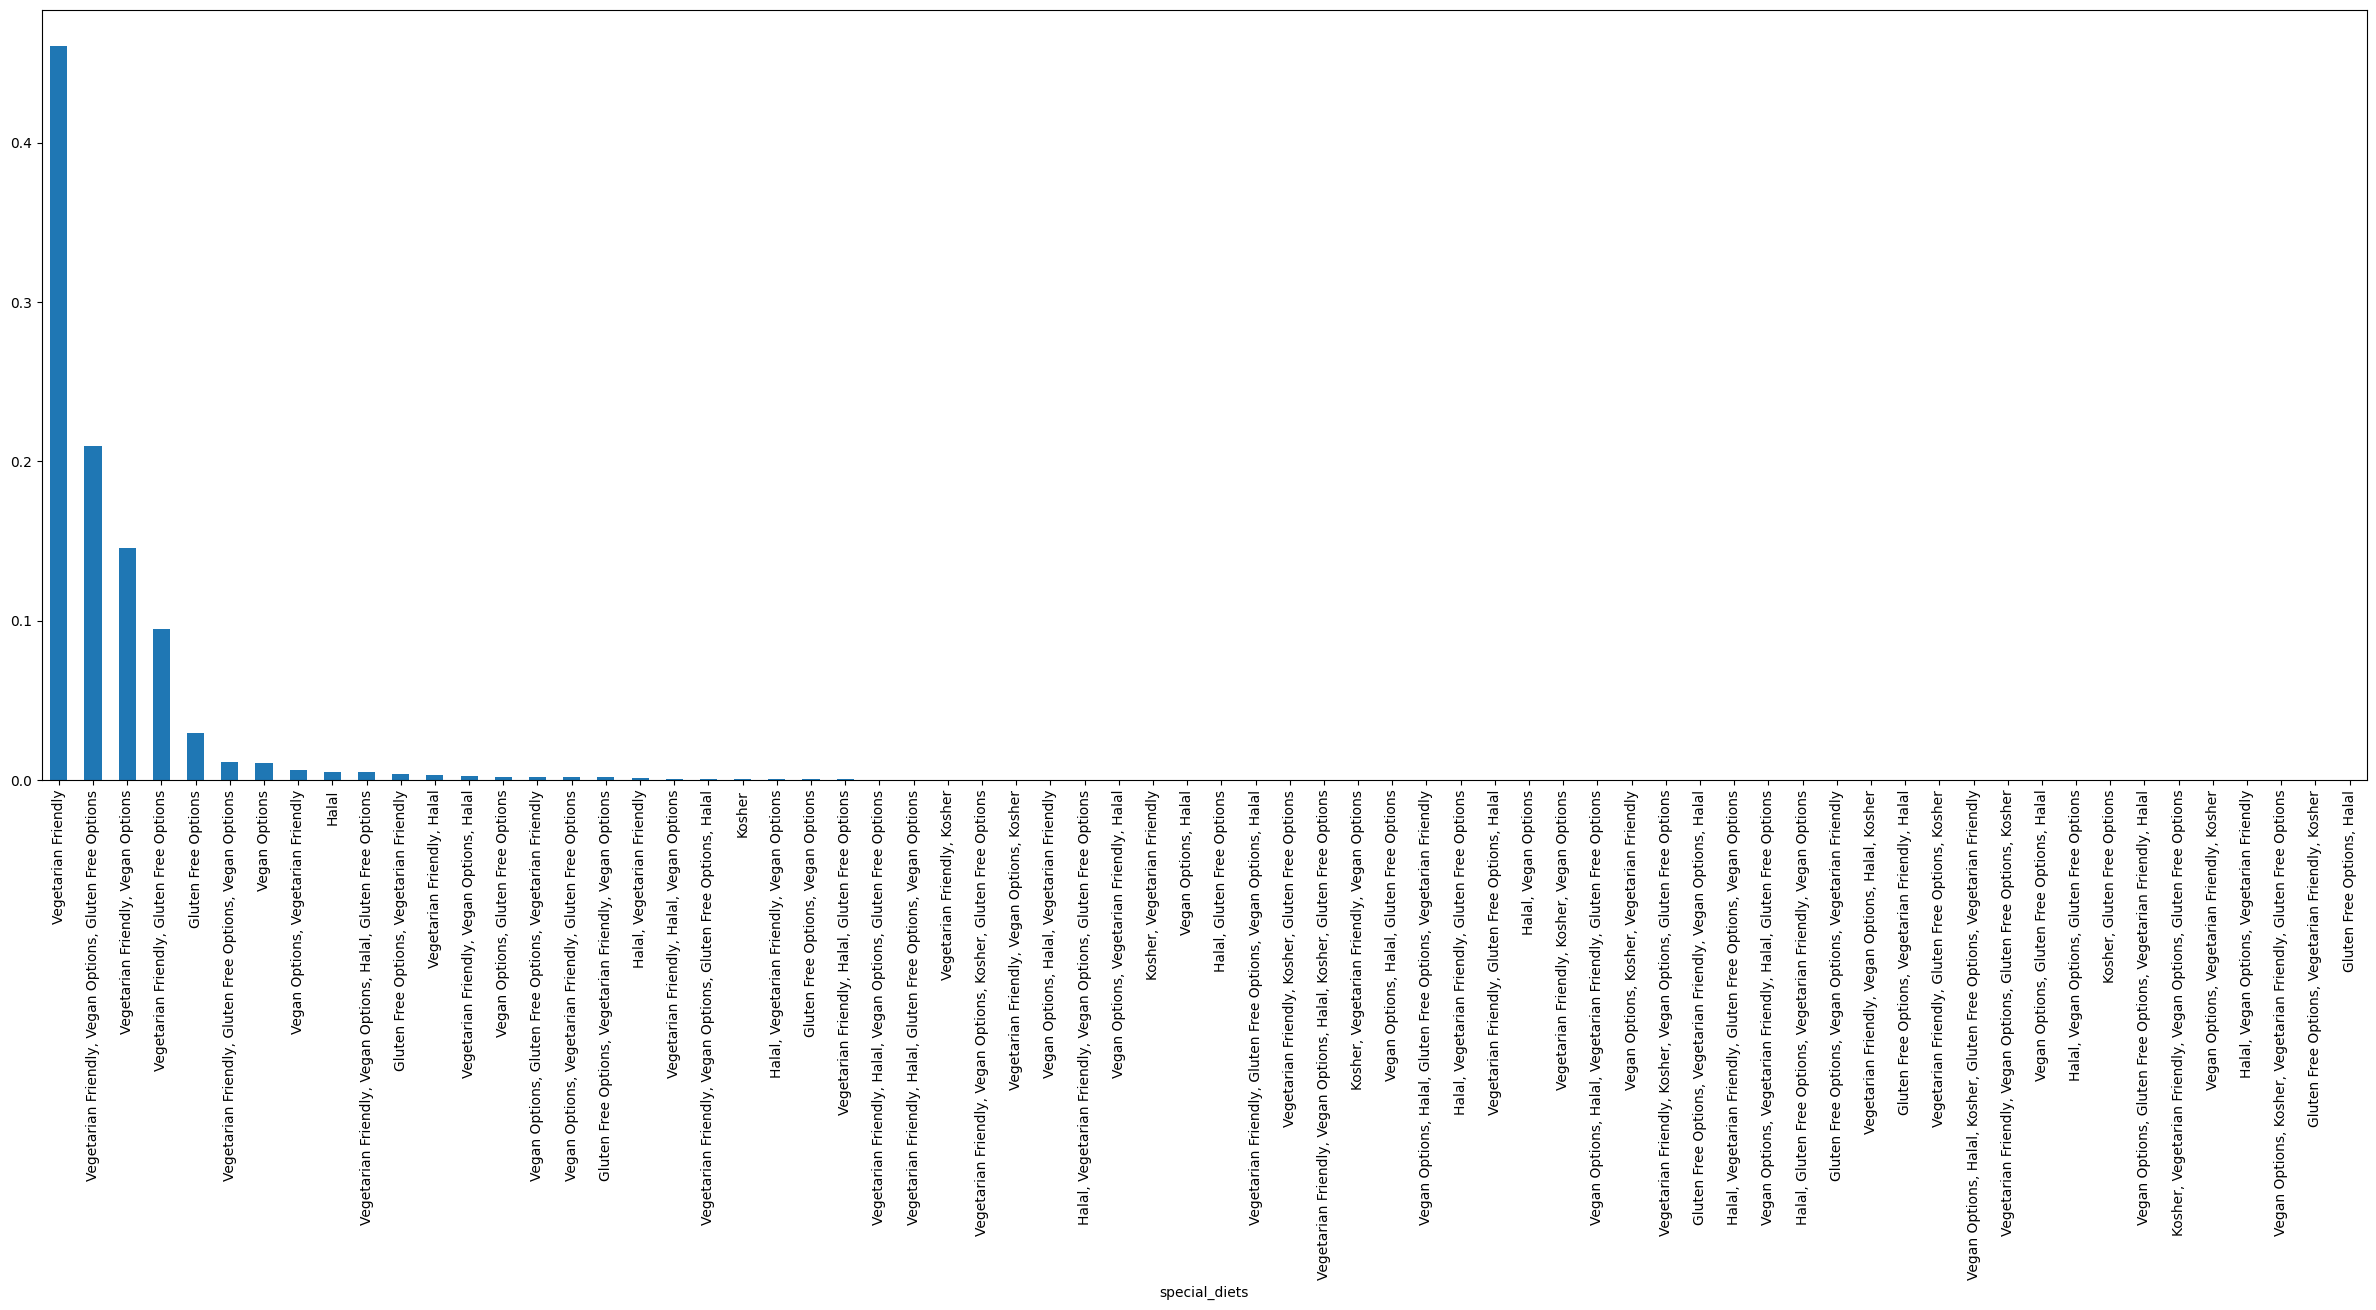

In [15]:
df['special_diets'].dropna().value_counts(normalize=True).plot(kind='bar', figsize=(30,10))

In [16]:
dfs = pd.DataFrame()
dfs['special_diets_split'] = df['special_diets'].dropna().str.split(', ')

In [17]:
diets = dfs['special_diets_split'].explode().value_counts()
diets_norm = dfs['special_diets_split'].explode().value_counts(normalize=True)

<Axes: ylabel='proportion'>

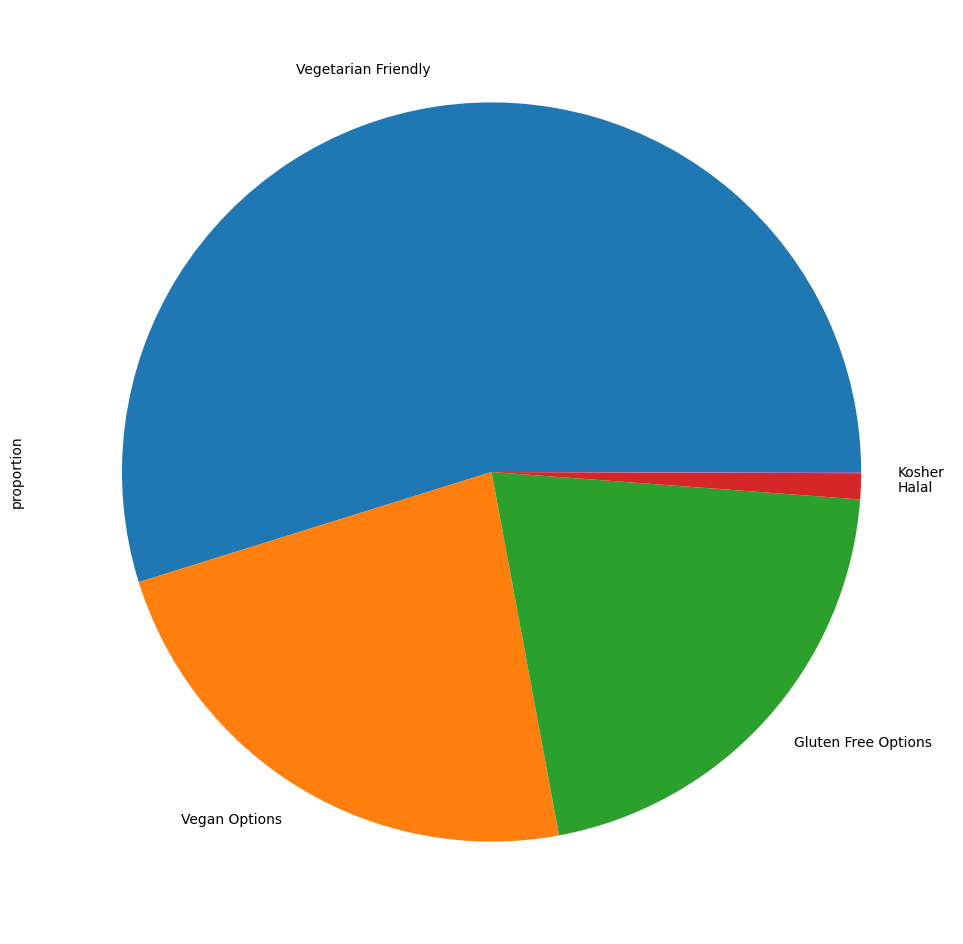

In [18]:
diets_norm.plot(kind='pie', figsize=(25,12))

<Axes: xlabel='special_diets_split'>

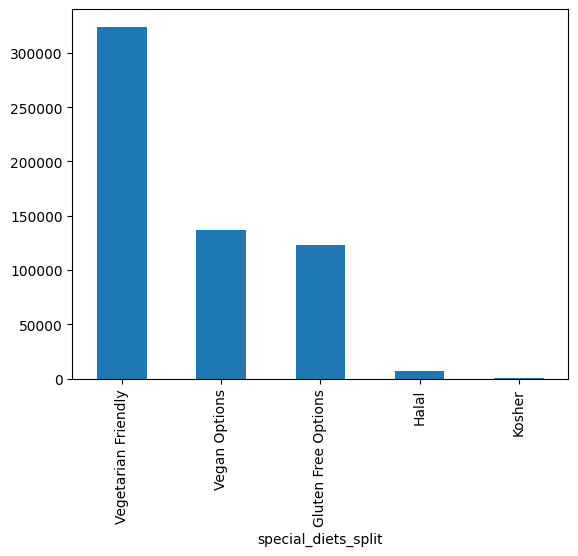

In [19]:
diets.plot(kind='bar')

In [20]:
dfs['cuisines_split'] = df['cuisines'].dropna().str.split(', ')

In [21]:
cuisines_values = dfs['cuisines_split'].explode().value_counts()
cuisines_values_normalized = dfs['cuisines_split'].explode().value_counts(normalize=True)

<Axes: ylabel='proportion'>

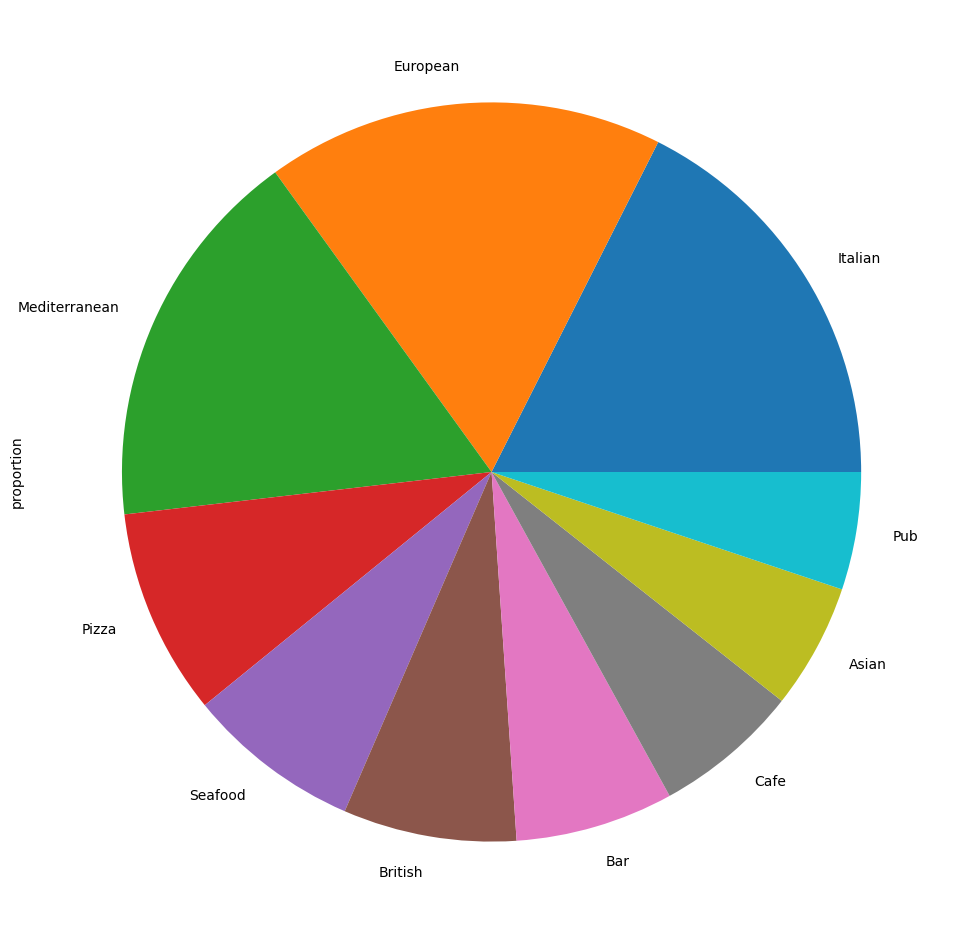

In [22]:
cuisines_values_normalized[:10].plot(kind='pie', figsize=(25,12))

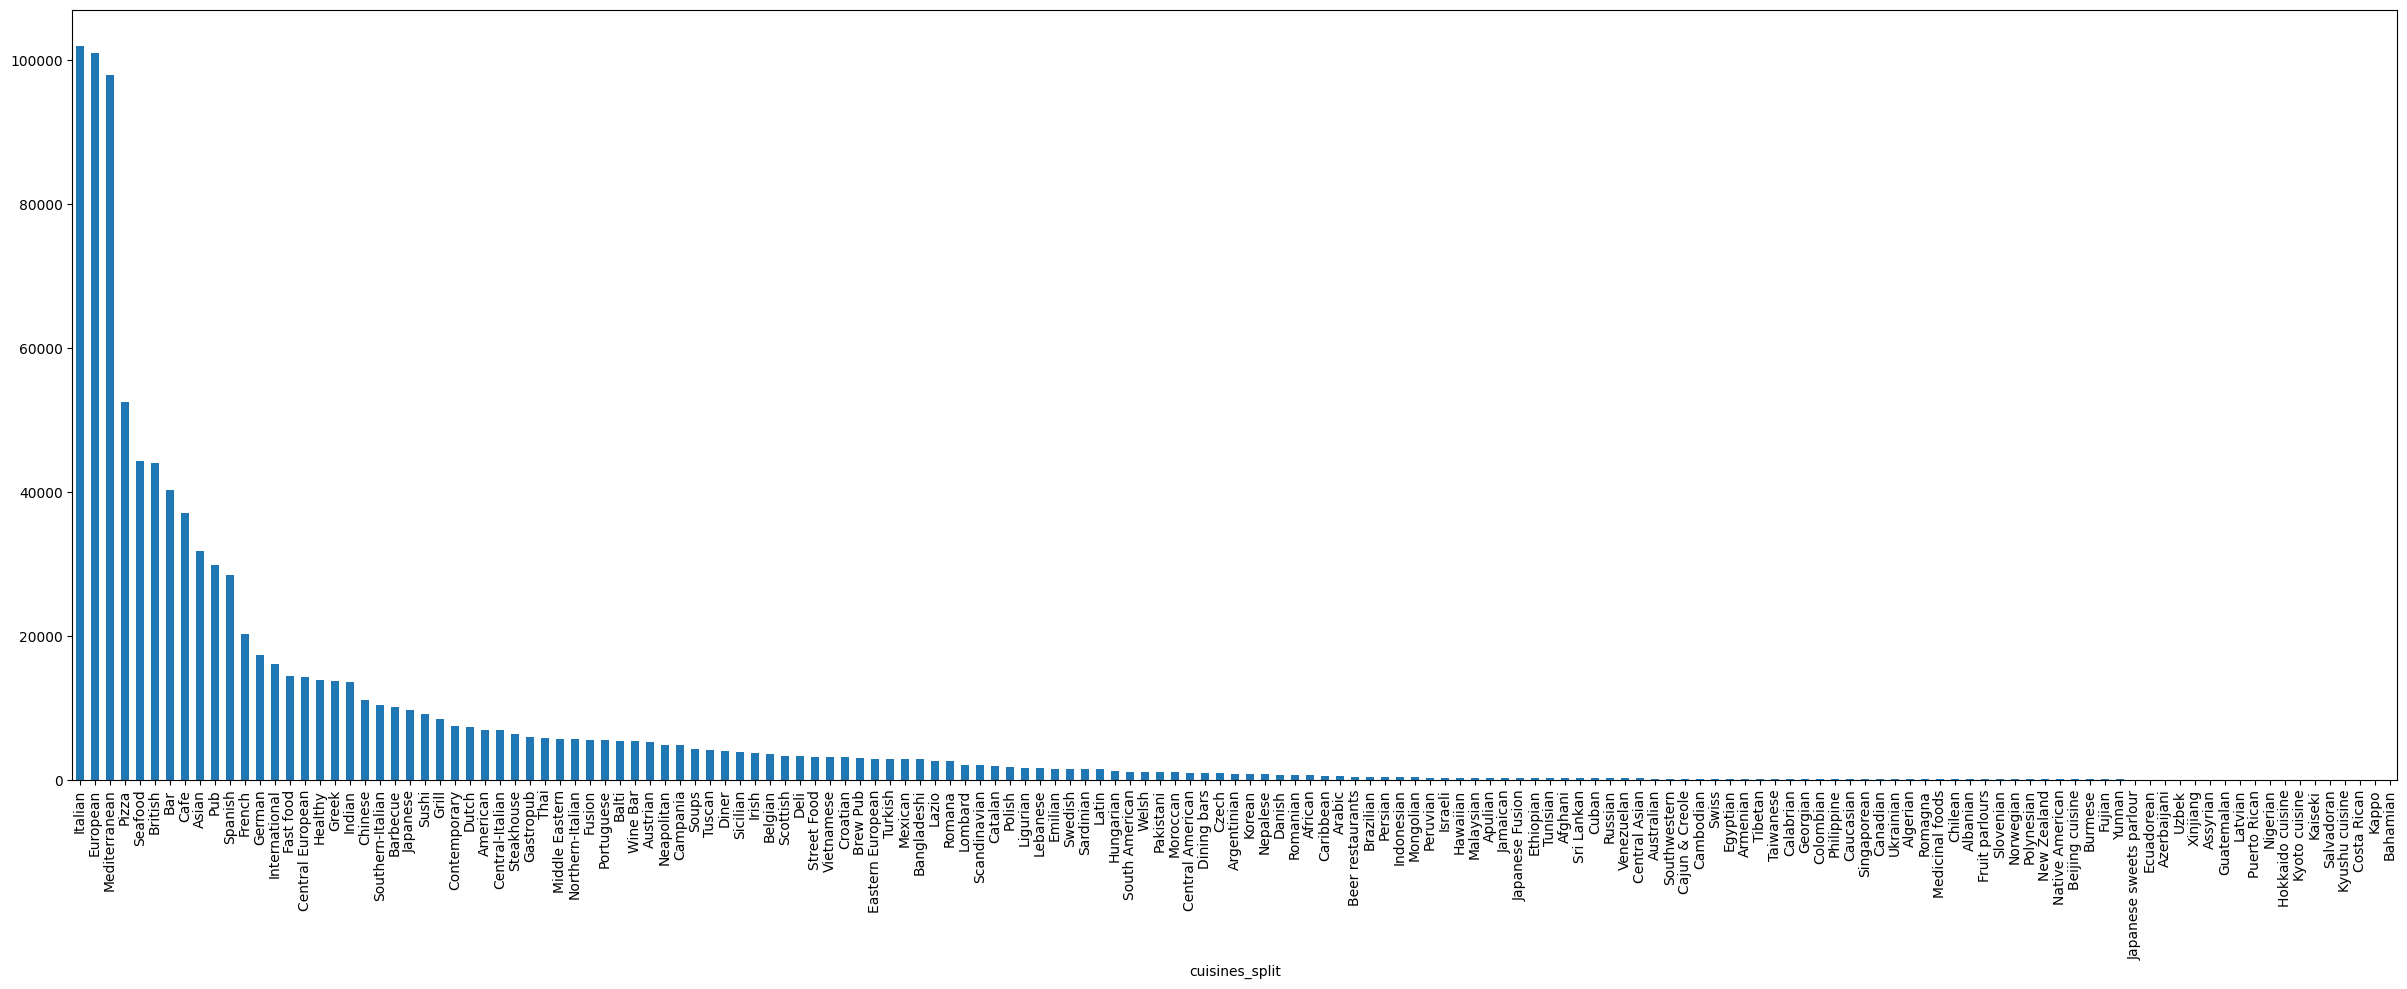

In [23]:
ax = cuisines_values.plot(kind='bar', figsize=(30,10))
ax
fig = ax.get_figure()
fig.savefig('imgs/cuisines.png')

In [42]:
df.columns

Index(['restaurant_link', 'restaurant_name', 'original_location', 'country',
       'region', 'province', 'city', 'address', 'latitude', 'longitude',
       'claimed', 'awards', 'popularity_detailed', 'popularity_generic',
       'top_tags', 'price_level', 'price_range', 'meals', 'cuisines',
       'special_diets', 'features', 'vegetarian_friendly', 'vegan_options',
       'gluten_free', 'original_open_hours', 'open_days_per_week',
       'open_hours_per_week', 'working_shifts_per_week', 'avg_rating',
       'total_reviews_count', 'default_language',
       'reviews_count_in_default_language', 'excellent', 'very_good',
       'average', 'poor', 'terrible', 'food', 'service', 'value', 'atmosphere',
       'keywords'],
      dtype='object')

In [44]:
df['avg_rating'].value_counts()

avg_rating
4.0    296979
4.5    293794
3.5    147287
5.0    128107
3.0     70326
2.5     26565
2.0     13456
1.0      6381
1.5      3866
Name: count, dtype: int64

In [45]:
df[['excellent', 'very_good', 'average', 'poor', 'terrible']]

,excellent,very_good,average,poor,terrible
0,2.0,0.0,0.0,0.0,0.0
1,2.0,2.0,1.0,0.0,0.0
2,3.0,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0
4,4.0,7.0,0.0,0.0,0.0
...,...,...,...,...,...
1083392,0.0,0.0,0.0,0.0,1.0
1083393,0.0,1.0,1.0,1.0,2.0
1083394,1.0,0.0,0.0,0.0,1.0
1083395,NaN,NaN,NaN,NaN,NaN


In [24]:
dfg

,restaurant_name,country,city,latitude,longitude,price_level,price_range,cuisines,special_diets,features,vegetarian_friendly,vegan_options,gluten_free
0,Le 147,France,Saint-Jouvent,45.961674,1.169131,€,NaN,French,NaN,"Reservations, Seating, Wheelchair Accessible, ...",N,N,N
1,Le Saint Jouvent,France,Saint-Jouvent,45.957040,1.205480,€,NaN,NaN,NaN,NaN,N,N,N
2,Au Bout du Pont,France,Rivarennes,46.635895,1.386133,€,NaN,"French, European",NaN,"Reservations, Seating, Table Service, Wheelcha...",N,N,N
3,Le Relais de Naiade,France,Lacelle,45.642610,1.824460,€,NaN,French,NaN,"Reservations, Seating, Serves Alcohol, Table S...",N,N,N
4,Relais Du MontSeigne,France,Saint-Laurent-de-Levezou,44.208860,2.960470,€€-€€€,NaN,French,NaN,"Reservations, Seating, Wheelchair Accessible, ...",N,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1083392,Complex Popas Pacurari,Romania,NaN,47.172950,27.519110,NaN,NaN,NaN,NaN,NaN,N,N,N
1083393,Casa Pastravarului DORIPESCO,Romania,Apata,45.904423,25.470509,€€-€€€,NaN,Eastern European,NaN,NaN,N,N,N
1083394,Hanul Tentea,Romania,Sacel,47.631920,24.450910,NaN,NaN,NaN,NaN,NaN,N,N,N
1083395,Casa Paduraru,Romania,NaN,44.918950,24.867634,€,€2-€8,"French, American, Bar, International, European...",NaN,NaN,N,N,N


# YELP

In [2]:
reviews_df = pd.read_feather(os.path.join(root, 'yelp', 'yelp_academic_dataset_review.feather'))

In [36]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6990280 entries, 0 to 6990279
Data columns (total 9 columns):
 #   Column       Dtype  
---  ------       -----  
 0   review_id    object 
 1   user_id      object 
 2   business_id  object 
 3   stars        float64
 4   useful       int64  
 5   funny        int64  
 6   cool         int64  
 7   text         object 
 8   date         object 
dtypes: float64(1), int64(3), object(5)
memory usage: 480.0+ MB


In [3]:
reviews_df.describe()

,stars,useful,funny,cool
count,6.990280e+06,6.990280e+06,6.990280e+06,6.990280e+06
mean,3.748584e+00,1.184609e+00,3.265596e-01,4.986175e-01
std,1.478705e+00,3.253767e+00,1.688729e+00,2.172460e+00
min,1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00
25%,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,5.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
max,5.000000e+00,1.182000e+03,7.920000e+02,4.040000e+02


In [4]:
reviews_df.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5.0,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3.0,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4.0,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15


In [5]:
reviews_df.shape

(6990280, 9)

In [31]:
reviews_df.review_id.nunique()

6990280

In [32]:
reviews_df.user_id.nunique()

1987929

In [33]:
reviews_df.business_id.nunique()

150346

<Axes: xlabel='stars'>

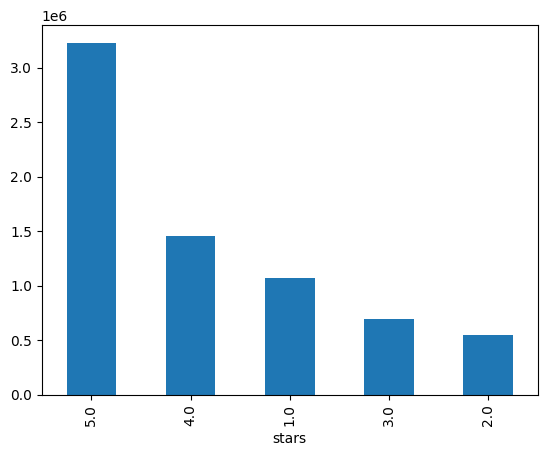

In [38]:
reviews_df.stars.value_counts().plot(kind='bar')

In [6]:
data_df = pd.read_feather(os.path.join(root, 'yelp', 'yelp_academic_dataset_business.feather'))

In [7]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150346 entries, 0 to 150345
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   business_id   150346 non-null  object 
 1   name          150346 non-null  object 
 2   address       150346 non-null  object 
 3   city          150346 non-null  object 
 4   state         150346 non-null  object 
 5   postal_code   150346 non-null  object 
 6   latitude      150346 non-null  float64
 7   longitude     150346 non-null  float64
 8   stars         150346 non-null  float64
 9   review_count  150346 non-null  int64  
 10  is_open       150346 non-null  int64  
 11  attributes    136602 non-null  object 
 12  categories    150243 non-null  object 
 13  hours         127123 non-null  object 
dtypes: float64(3), int64(2), object(9)
memory usage: 16.1+ MB


In [8]:
data_df.columns

Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'stars', 'review_count', 'is_open',
       'attributes', 'categories', 'hours'],
      dtype='object')

In [9]:
data_df.describe()

,latitude,longitude,stars,review_count,is_open
count,150346.000000,150346.000000,150346.000000,150346.000000,150346.00000
mean,36.671150,-89.357339,3.596724,44.866561,0.79615
std,5.872759,14.918502,0.974421,121.120136,0.40286
min,27.555127,-120.095137,1.000000,5.000000,0.00000
25%,32.187293,-90.357810,3.000000,8.000000,1.00000
50%,38.777413,-86.121179,3.500000,15.000000,1.00000
75%,39.954036,-75.421542,4.500000,37.000000,1.00000
max,53.679197,-73.200457,5.000000,7568.000000,1.00000


In [34]:
data_df.business_id.nunique()

150346

In [10]:
dfs = data_df['categories'].str.split(', ')

<Axes: xlabel='categories'>

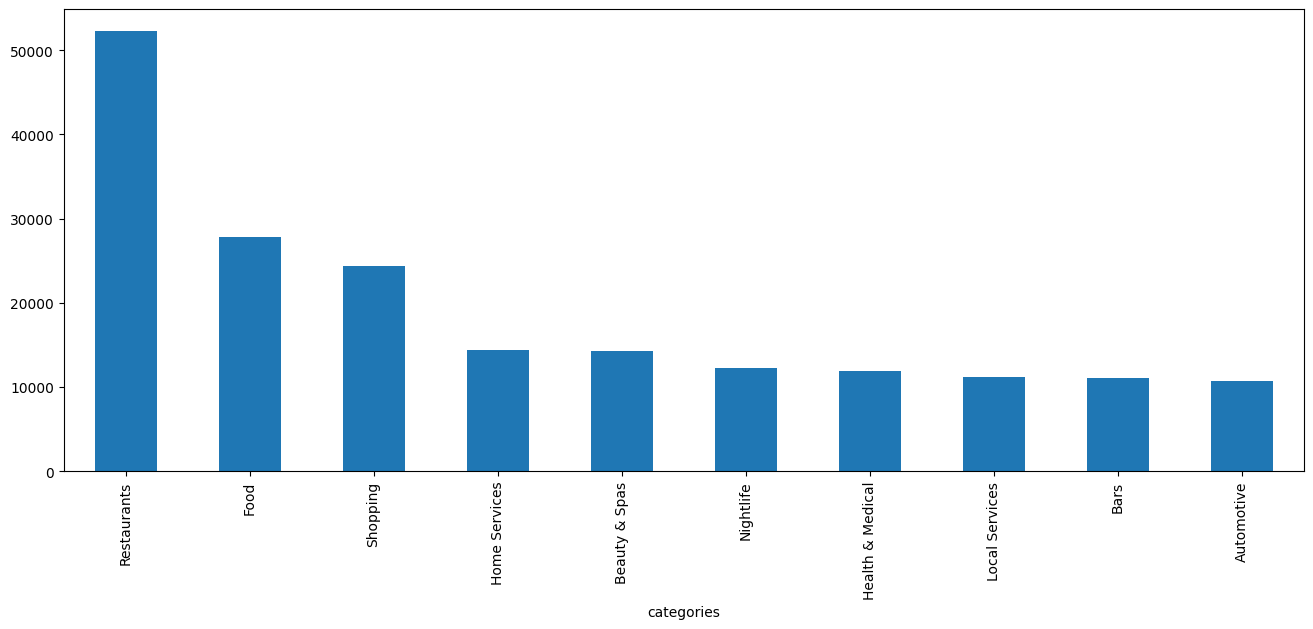

In [11]:
dfs.explode().value_counts()[:10].plot(kind='bar', figsize=(16,6))

In [12]:
dfs = data_df.where(data_df['categories'].str.contains('Restaurants', na=False)).dropna()

In [21]:
dfs['categories'].str.split(', ').explode().value_counts()[:10]

categories
Restaurants               44676
Food                      13816
Nightlife                  8036
Bars                       7713
Sandwiches                 7623
American (Traditional)     7419
Pizza                      6026
Fast Food                  5959
Breakfast & Brunch         5861
American (New)             5511
Name: count, dtype: int64

<Axes: xlabel='categories'>

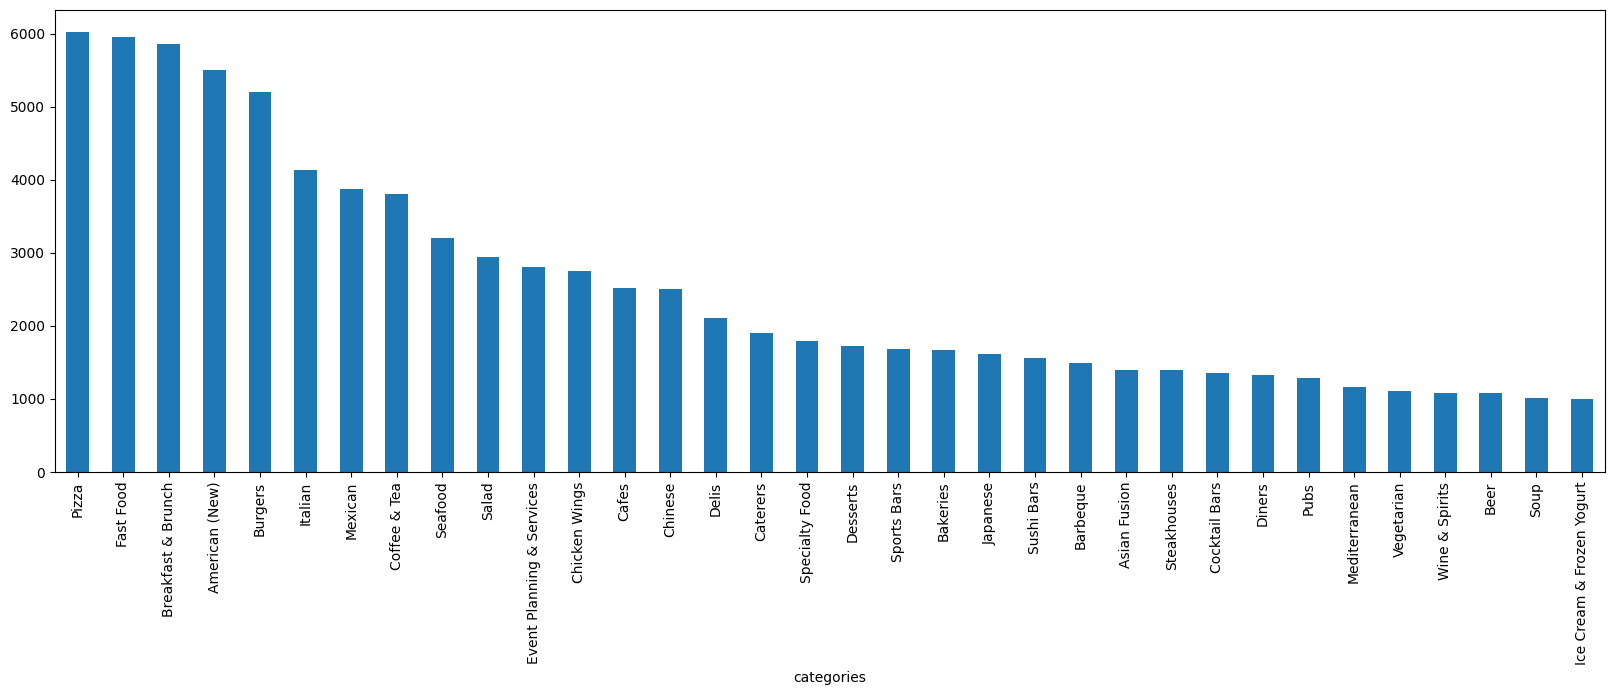

In [24]:
dfs['categories'].str.split(', ').explode().value_counts()[6:40].plot(kind='bar', figsize=(20,6))

In [14]:
data_df['attributes'].dropna().apply(lambda x: x['RestaurantsPriceRange2'] if 'RestaurantsPriceRange2' in x else np.nan).value_counts()

attributes
2       48581
1       28840
3        6667
4        1192
None       34
Name: count, dtype: int64

<Axes: ylabel='count'>

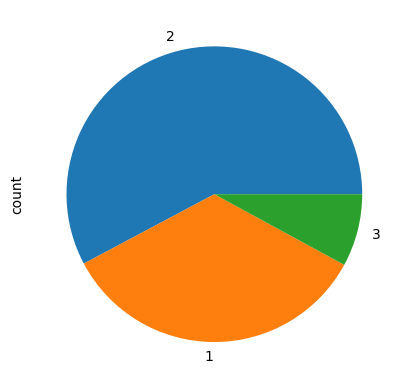

In [27]:
data_df['attributes'].dropna().apply(lambda x: x['RestaurantsPriceRange2'] if 'RestaurantsPriceRange2' in x else np.nan).value_counts()[:-2].plot(kind='pie')

In [15]:
data_df['attributes'].dropna().apply(lambda x: x['WheelchairAccessible'] if 'WheelchairAccessible' in x else np.nan).value_counts()

attributes
True     25993
False     2933
None        27
Name: count, dtype: int64

<Axes: ylabel='count'>

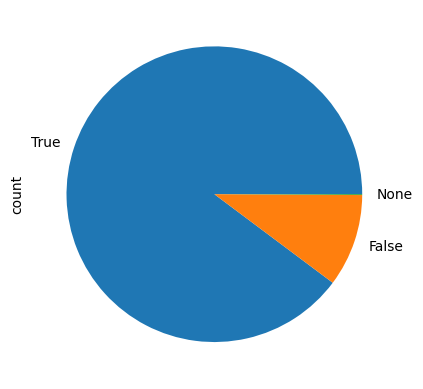

In [28]:
data_df['attributes'].dropna().apply(lambda x: x['WheelchairAccessible'] if 'WheelchairAccessible' in x else np.nan).value_counts().plot(kind='pie')

In [16]:
data_df['attributes'].dropna().apply(lambda x: x['DietaryRestrictions'] if 'DietaryRestrictions' in x else np.nan).value_counts()


attributes
{'dairy-free': False, 'gluten-free': True, 'vegan': False, 'kosher': False, 'halal': False, 'soy-free': False, 'vegetarian': False}    12
{'dairy-free': False, 'gluten-free': False, 'vegan': True, 'kosher': False, 'halal': False, 'soy-free': False, 'vegetarian': True}      4
{'dairy-free': True, 'gluten-free': True, 'vegan': True, 'kosher': False, 'halal': False, 'soy-free': True, 'vegetarian': True}         4
{'dairy-free': False, 'gluten-free': False, 'vegan': False, 'kosher': False, 'halal': False, 'soy-free': False, 'vegetarian': True}     3
{'dairy-free': False, 'gluten-free': False, 'vegan': True, 'kosher': False, 'halal': False, 'soy-free': False, 'vegetarian': False}     2
{'dairy-free': True, 'gluten-free': False, 'vegan': True, 'kosher': False, 'halal': False, 'soy-free': False, 'vegetarian': False}      1
None                                                                                                                                    1
{'dairy-free': False, '

In [17]:
attribute_keys = set([key for dict_ in data_df['attributes'].dropna() for key in dict_.keys()])

In [18]:
attribute_keys

{'AcceptsInsurance',
 'AgesAllowed',
 'Alcohol',
 'Ambience',
 'BYOB',
 'BYOBCorkage',
 'BestNights',
 'BikeParking',
 'BusinessAcceptsBitcoin',
 'BusinessAcceptsCreditCards',
 'BusinessParking',
 'ByAppointmentOnly',
 'Caters',
 'CoatCheck',
 'Corkage',
 'DietaryRestrictions',
 'DogsAllowed',
 'DriveThru',
 'GoodForDancing',
 'GoodForKids',
 'GoodForMeal',
 'HairSpecializesIn',
 'HappyHour',
 'HasTV',
 'Music',
 'NoiseLevel',
 'Open24Hours',
 'OutdoorSeating',
 'RestaurantsAttire',
 'RestaurantsCounterService',
 'RestaurantsDelivery',
 'RestaurantsGoodForGroups',
 'RestaurantsPriceRange2',
 'RestaurantsReservations',
 'RestaurantsTableService',
 'RestaurantsTakeOut',
 'Smoking',
 'WheelchairAccessible',
 'WiFi'}

# DEBUG

In [2]:
# Load the Yelp businesses and reviews datasets
businesses_df = pd.read_feather(os.path.join('data', 'yelp', 'yelp_academic_dataset_business.feather'),)
print('buinesses_df loaded')

reviews_df = pd.read_feather(os.path.join('data', 'yelp', 'yelp_academic_dataset_review.feather'))
print('reviews_df loaded')

buinesses_df loaded
reviews_df loaded


In [3]:
# Filter businesses by category (e.g., restaurants)
print('Filter businesses by category (e.g., restaurants)')
businesses_df = businesses_df.where(businesses_df['categories'].str.contains('Restaurants', na=False)).dropna()

Filter businesses by category (e.g., restaurants)


In [4]:
# Extract unique restaurant IDs and create a dictionary mapping them to indices
print('Extract unique restaurant IDs and create a dictionary mapping them to indices')
restaurant_ids = businesses_df['business_id'].unique().tolist()
num_restaurants = len(restaurant_ids)
restaurant_indices = dict(zip(restaurant_ids, range(num_restaurants)))

Extract unique restaurant IDs and create a dictionary mapping them to indices


In [5]:
reviews_df = reviews_df.merge(businesses_df[['business_id']], on='business_id')


In [6]:
reviews_df.shape

(4557625, 9)

In [7]:
reviews_df = reviews_df[['review_id', 'user_id', 'business_id', 'stars', 'text']]

In [8]:
top20k = reviews_df['user_id'].value_counts()[:20000].index.tolist()

In [9]:
reviews_subdf = reviews_df[reviews_df['user_id'].isin(top20k)]
businesses_subdf = businesses_df[businesses_df['business_id'].isin(top20k)]

In [10]:
# # Merge the reviews dataframe with the businesses dataframe to get the restaurant ratings
reviews_subdf = reviews_subdf.merge(businesses_subdf[['business_id']], on='business_id')

In [11]:
restaurant_ratings = reviews_subdf.groupby(['business_id', 'user_id'])['stars'].mean().reset_index()

# Create a sparse tensor representing the restaurant ratings
restaurant_indices_inv = {v: k for k, v in restaurant_indices.items()}

In [12]:
restaurant_ratings = restaurant_ratings.dropna(subset=['business_id', 'user_id'])

In [13]:
user_ratings_df = restaurant_ratings.pivot(index='business_id', columns='user_id', values='stars').fillna(0)

In [14]:
restaurant_indices_inv

{0: 'MTSW4McQd7CbVtyjqoe9mw',
 1: 'CF33F8-E6oudUQ46HnavjQ',
 2: 'bBDDEgkFA1Otx9Lfe7BZUQ',
 3: 'eEOYSgkmpB90uNA7lDOMRA',
 4: 'il_Ro8jwPlHresjw9EGmBg',
 5: '0bPLkL0QhhPO5kt1_EXmNQ',
 6: 'MUTTqe8uqyMdBl186RmNeA',
 7: 'ROeacJQwBeh05Rqg7F6TCg',
 8: 'WKMJwqnfZKsAae75RMP6jA',
 9: 'kfNv-JZpuN6TVNSO6hHdkw',
 10: '9OG5YkX1g2GReZM0AskizA',
 11: 'tMkwHmWFUEXrC9ZduonpTg',
 12: 'QdN72BWoyFypdGJhhI5r7g',
 13: 'sqSqqLy0sN8n2IZrAbzidQ',
 14: 'Mjboz24M9NlBeiOJKLEd_Q',
 15: 'kV_Q1oqis8Qli8dUoGpTyQ',
 16: 'aPNXGTDkf-4bjhyMBQxqpQ',
 17: 'ljxNT9p0y7YMPx0fcNBGig',
 18: 'wghnIlMb_i5U46HMBGx9ig',
 19: 'lk9IwjZXqUMqqOhM774DtQ',
 20: 'ABxoFuzZy5mqQ8C5FJJajQ',
 21: 'cVBxfMC4lp3DnocjYA3FHQ',
 22: 'uI9XODGY_2_ieTE6xJ0myw',
 23: 'JgpnXv_0XhV3SfbfB50nxw',
 24: 'Si6LXSR9gvAbmgO5DzV2cw',
 25: 'seKihQKpGGnCeLuELRQPSQ',
 26: 'aCDY7vXYMs54EbYuQScsnQ',
 27: 'pJfh3Ct8iL58NZa8ta-a5w',
 28: 'ppFCk9aQkM338Rgwpl2F5A',
 29: 'IDtLPgUrqorrpqSLdfMhZQ',
 30: 'YNjyv0gfOr2g8lbmUpTnKg',
 31: 'LhpPSrulqVeTyJeK2xydvQ',
 32: 'oaboaRBUgGjb

In [20]:
user_ratings_df = user_ratings_df.rename(index=restaurant_indices)

In [21]:
import torch

In [22]:
user_ratings = torch.FloatTensor(user_ratings_df.values)

In [23]:
user_ratings

tensor([[5., 5., 0.,  ..., 4., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 2., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 4.,  ..., 0., 4., 0.],
        [0., 0., 0.,  ..., 0., 0., 5.]])

In [25]:
adjacency_matrix = torch.zeros((num_restaurants, num_restaurants))
for _, row in businesses_df.iterrows():
    i = restaurant_indices[row['business_id']]
    j = restaurant_indices[row['business_id']]
    adjacency_matrix[i, j] = 1
    adjacency_matrix[j, i] = 1

node_features = businesses_df[['categories', 'review_count', 'stars']].values


In [26]:
node_features

array([['Restaurants, Food, Bubble Tea, Coffee & Tea, Bakeries', 80.0,
        4.0],
       ['Burgers, Fast Food, Sandwiches, Food, Ice Cream & Frozen Yogurt, Restaurants',
        6.0, 2.0],
       ['Ice Cream & Frozen Yogurt, Fast Food, Burgers, Restaurants, Food',
        10.0, 1.5],
       ...,
       ['Restaurants, Mexican', 35.0, 4.5],
       ['Restaurants, Comfort Food, Food, Food Trucks, Caterers, Event Planning & Services',
        14.0, 4.5],
       ['Middle Eastern, Restaurants', 18.0, 4.5]], dtype=object)

In [27]:
node_features = torch.FloatTensor(node_features)

TypeError: can't convert np.ndarray of type numpy.object_. The only supported types are: float64, float32, float16, complex64, complex128, int64, int32, int16, int8, uint8, and bool.

# GOOGLE MAPS 

In [ ]:
pattern = re.compile(r'^restautant_W+.json')

In [ ]:
os.listdir(root)

In [ ]:
data = {}
for file in os.listdir(root):
    if file.startswith('restaurant_'):
        try:
            with open(os.path.join(root, file), 'r') as f:
                fdata = json.load(f)
            data[fdata['result']['name']] = {
                'rating': fdata['result']['rating'],
                'reviews': fdata['result']['reviews'],
                }
        except KeyError:
            print(file)
        

In [ ]:
data

In [ ]:
for k,v in data.items():
    ratings_mean = np.mean([vv['rating'] for vv in v['reviews']])
    print(f'{k:50}: reviews rating mean: {ratings_mean}')
    